<font color='darkblue'></font>

### *ANOTAÇÕES*
1) Nó raiz (root node) → é o ponto inicial, onde a árvore começa (primeira pergunta sobre os dados).

2) Divisão (split) → é o processo de separar os dados em grupos menores com base em uma condição.

3) Nós internos (decision nodes) → representam perguntas ou condições que dividem os dados.

4) Ramos (branches) → são os caminhos possíveis, baseados nas respostas das perguntas.

5) Folhas (leaves) → são os resultados finais (a decisão ou previsão).


Critério de divisão: é a forma de escolher a “melhor pergunta”. Normalmente, usa-se medidas como:

→ Gini ou Entropia (para classificação).

→ Erro quadrático médio (MSE) (para regressão).

# <font color='blue'>Marina Napolão - EBAC</font>

# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

print(np.__version__)
print(pd.__version__)
print(sns.__version__)

C:\Users\marina\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\marina\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


1.26.4
2.3.2
0.13.2


# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [2]:
#seu código aqui
base_path = r"C:\PythonEBAC\jupyter-notebook\Arvore de Decisão\dados/"

X_test = pd.read_csv(base_path + "X_test", delimiter = ',')
X_train = pd.read_csv(base_path + "X_train_balanced.csv", delimiter = ',')
y_test = pd.read_csv(base_path + "y_test", delimiter = ',')
y_train = pd.read_csv(base_path + "y_train_balanced.csv", delimiter = ',')

In [3]:
X_test

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_enconded,Pais_GERMANY,Pais_SPAIN
0,686,36.0,3,95848.58,2,0.0,1.0,7144694.0,1,0,0
1,703,35.0,1,0.00,1,1.0,1.0,14136462.0,1,0,0
2,730,26.0,6,0.00,1,1.0,1.0,1011687.0,1,0,1
3,675,33.0,6,0.00,2,0.0,1.0,1011687.0,0,0,0
4,754,24.0,3,121513.31,2,0.0,1.0,1011687.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
24922,786,37.0,4,0.00,2,0.0,1.0,1011687.0,0,0,1
24923,592,35.0,7,122724.50,1,1.0,1.0,17773874.0,1,0,0
24924,645,45.0,7,121286.32,1,1.0,1.0,869372.0,1,0,0
24925,567,47.0,1,126447.40,1,1.0,0.0,1011687.0,0,1,0


In [4]:
y_test

,Churn
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
24922,0.0
24923,0.0
24924,0.0
24925,1.0


In [5]:
y_train

,Churn
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
117945,1.0
117946,1.0
117947,1.0
117948,1.0


In [6]:
contagem_classes = y_train.value_counts()

print("Contagem de amostras por classe:", contagem_classes)

Contagem de amostras por classe: Churn
0.0      58975
1.0      58975
Name: count, dtype: int64


In [7]:
X_train

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_enconded,Pais_GERMANY,Pais_SPAIN
0,711,35.000000,10,0.000000,2,1.000000,0.000000,5331178.0,1,0,0
1,619,33.000000,7,0.000000,2,0.000000,1.000000,1011687.0,1,0,0
2,841,54.000000,4,102721.490000,1,1.000000,1.000000,1011687.0,1,1,0
3,679,48.000000,6,125161.240000,1,1.000000,0.000000,579659.0,1,0,0
4,656,42.000000,6,0.000000,3,0.000000,0.000000,14233155.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
117945,529,43.000000,7,0.000000,1,0.514157,0.000000,1011687.0,1,0,1
117946,639,44.450575,7,0.000000,1,1.000000,0.725287,1011687.0,0,0,1
117947,541,49.890057,6,102744.063633,1,1.000000,0.000000,1011687.0,0,1,0
117948,593,37.911470,5,139949.785268,1,1.000000,0.000000,1011687.0,0,1,0


--------

# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

<font color='darkblue'>Primeiro recolhemos informações do histórico dos clientes, como a idade, renda, histórico de pagamentos, tempo de relacionamento com o banco, entre outros. Em seguida, realizamos um pré-processamento de dados, que inclui o tratamento de valores faltantes, a transformação de variáveis categóricas em números, o balanceamento das classes e uma análise exploratória da correlação e distribuição das variáveis.</font>

<font color='darkblue'>Com os dados prontos, separamos uma parte para o teste e o restante para treinamento do modelo preditivo usando a árvore de decisões. Depois, avaliamos a eficácia do modelo por meio de métricas como a acurácia, o recall, o F1-score e a matriz de confusão, que mostra os acertos e erros de cada classe. Assim, notamos se o modelo está tendo um bom desempenho ou não.</font>

<font color='darkblue'>Após a avaliação, analisamos a importância das variáveis(features) na árvore de decisão e realizamos um aprimoramento do modelo, como ajustar os hiperparâmetros. Com isso, verificamos se o nosso modelo está apto para ser aplicado ou precisa de mais ajustes.</font>

-------

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [8]:
X_test_copy = X_test.copy()
y_test_copy = y_test.copy()
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

In [9]:
#seu código aqui
arvore_churn = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
arvore_churn.fit(X_train_copy, y_train_copy)
print(arvore_churn.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}


In [10]:
previsoes = arvore_churn.predict(X_train_copy[:10])
print(previsoes)

[1. 0. 1. 1. 1. 0. 0. 0. 1. 0.]


In [11]:
previsoes = arvore_churn.predict(X_test_copy)
acuracia = accuracy_score(y_test_copy, previsoes)
print("Acurácia:", acuracia)

Acurácia: 0.7929554298551771


-------

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [12]:
#seu código aqui
relatorio = classification_report(y_test_copy, previsoes)
print("Relatorio de classificação:")
print(relatorio)

Relatorio de classificação:
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87     19649
         1.0       0.51      0.56      0.53      5278

    accuracy                           0.79     24927
   macro avg       0.69      0.71      0.70     24927
weighted avg       0.80      0.79      0.80     24927



In [13]:
matriz_confusao = confusion_matrix(y_test_copy, previsoes)
print(matriz_confusao)

[[16798  2851]
 [ 2310  2968]]


<font color='darkblue'>No relatório de classificação, vemos que a classe 0.0 (não churn) tem um desempenho muito bom. Já a classe 1.0 (churn) apresenta um desempenho fraco, tendo o recall 0.56. Isso mostra que o modelo consegue identificar 56% dos clientes que realmente saíram. O modelo teve uma boa acurácia de 0.79.</font>

<font color='darkblue'>Com a matriz_confusão, podemos observar que o modelo previu corretamente 16.798 clientes que ficaram (verdadeiro negativo) e 2.968 clientes que deram churn (verdadeiro positivo). Também vemos que o modelo errou ao prever que 2.851 clientes deram churn, enquanto, na verdade, os clientes permaneceram e deixou de identificar 2.310 clientes que saíram, tiveram churn.</font>

------

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

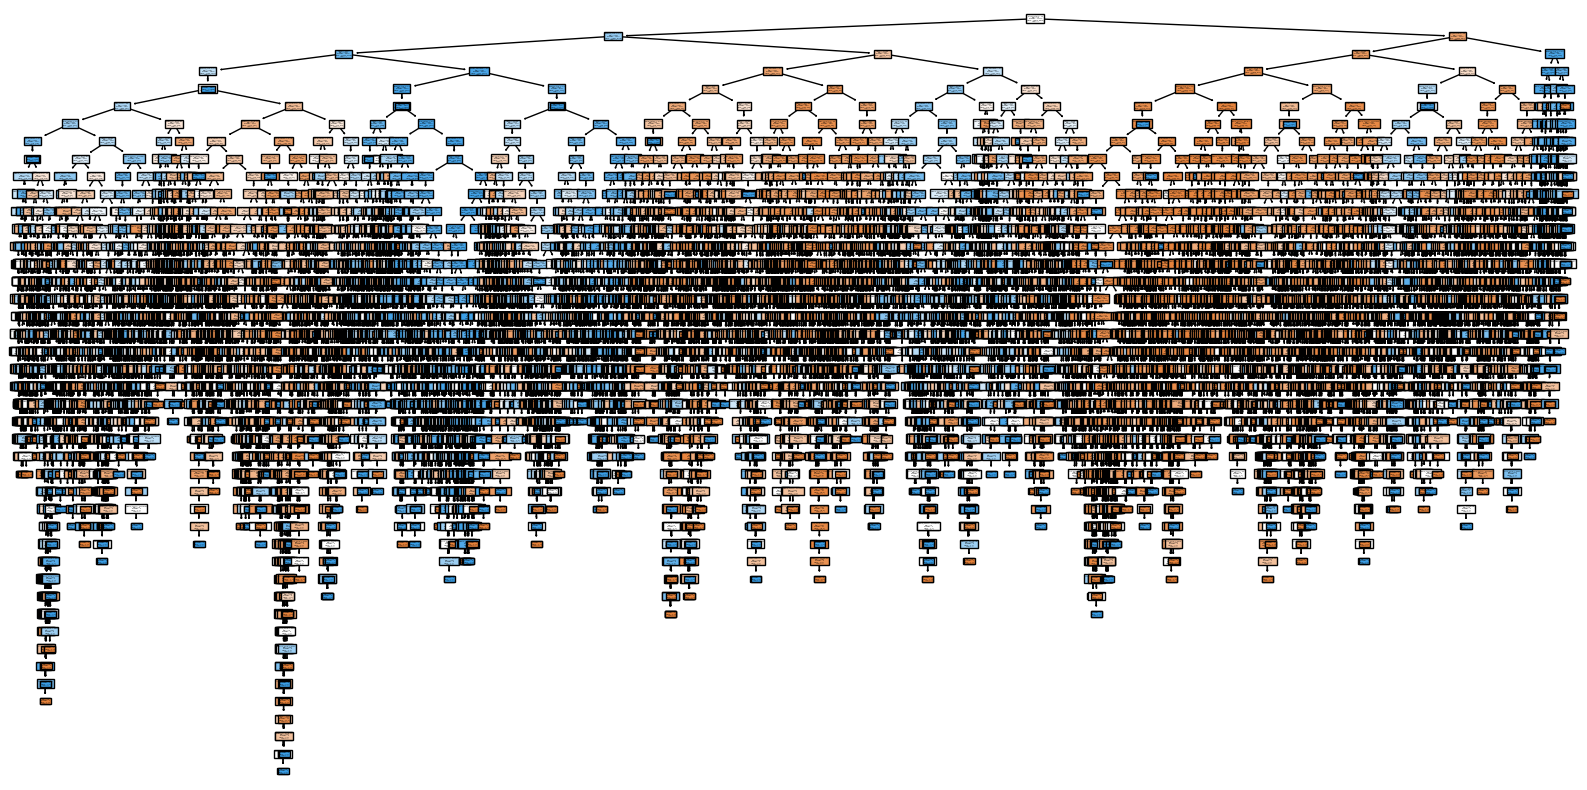

In [19]:
#seu código aqui
plt.figure(figsize=(20,10))
plot_tree(arvore_churn, filled=True, feature_names=X_train_copy.columns, class_names=['0', '1'])
plt.show()

<font color='darkblue'>A árvore de decisões completa, com todas as features, ficou bastante densa e cheia de nós, o que é esperado quando não tem limite de profundidade. Isso demonstra como o modelo tenta aprender todos os detalhes dos dados, mas a interpretação dos nós é dificultada.</font>

-----

# 6) Identifique as 2 principais features do modelo.


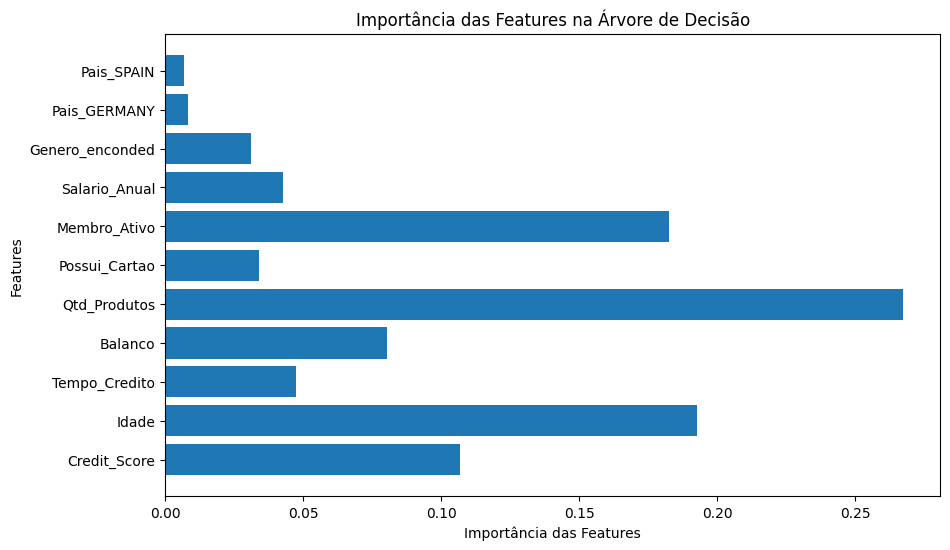

In [14]:
#seu código aqui
# Obtendo a importância das características do modelo de árvore de decisão
importancias_features = arvore_churn.feature_importances_

# Obtendo os nomes das características
nomes_features = X_train_copy.columns

# Criando um gráfico de barras para visualizar a importância das características
plt.figure(figsize=(10, 6))
plt.barh(nomes_features, importancias_features)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()

<font color='darkblue'>Principais features: Quantidade de produtos(Qtd_Produtos) e Idade</font>

-----

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [15]:
#seu código aqui
X_train_copy_reduzido = X_train_copy[['Qtd_Produtos', 'Idade']]
X_test_copy_reduzido = X_test_copy[['Qtd_Produtos', 'Idade']]

In [16]:
arvore_churn_reduzido = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
arvore_churn_reduzido.fit(X_train_copy_reduzido , y_train_copy)

DecisionTreeClassifier(random_state=0)

In [17]:
previsoes_reduzido = arvore_churn_reduzido.predict(X_test_copy_reduzido)
relatorio = classification_report(y_test_copy, previsoes_reduzido)
print("Relatório de Classificação: \n", relatorio)

Relatório de Classificação: 
               precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     19649
         1.0       0.67      0.52      0.59      5278

    accuracy                           0.85     24927
   macro avg       0.78      0.73      0.75     24927
weighted avg       0.84      0.85      0.84     24927



In [18]:
matriz_confusao = confusion_matrix(y_test_copy, previsoes_reduzido)
print(matriz_confusao)

[[18309  1340]
 [ 2520  2758]]


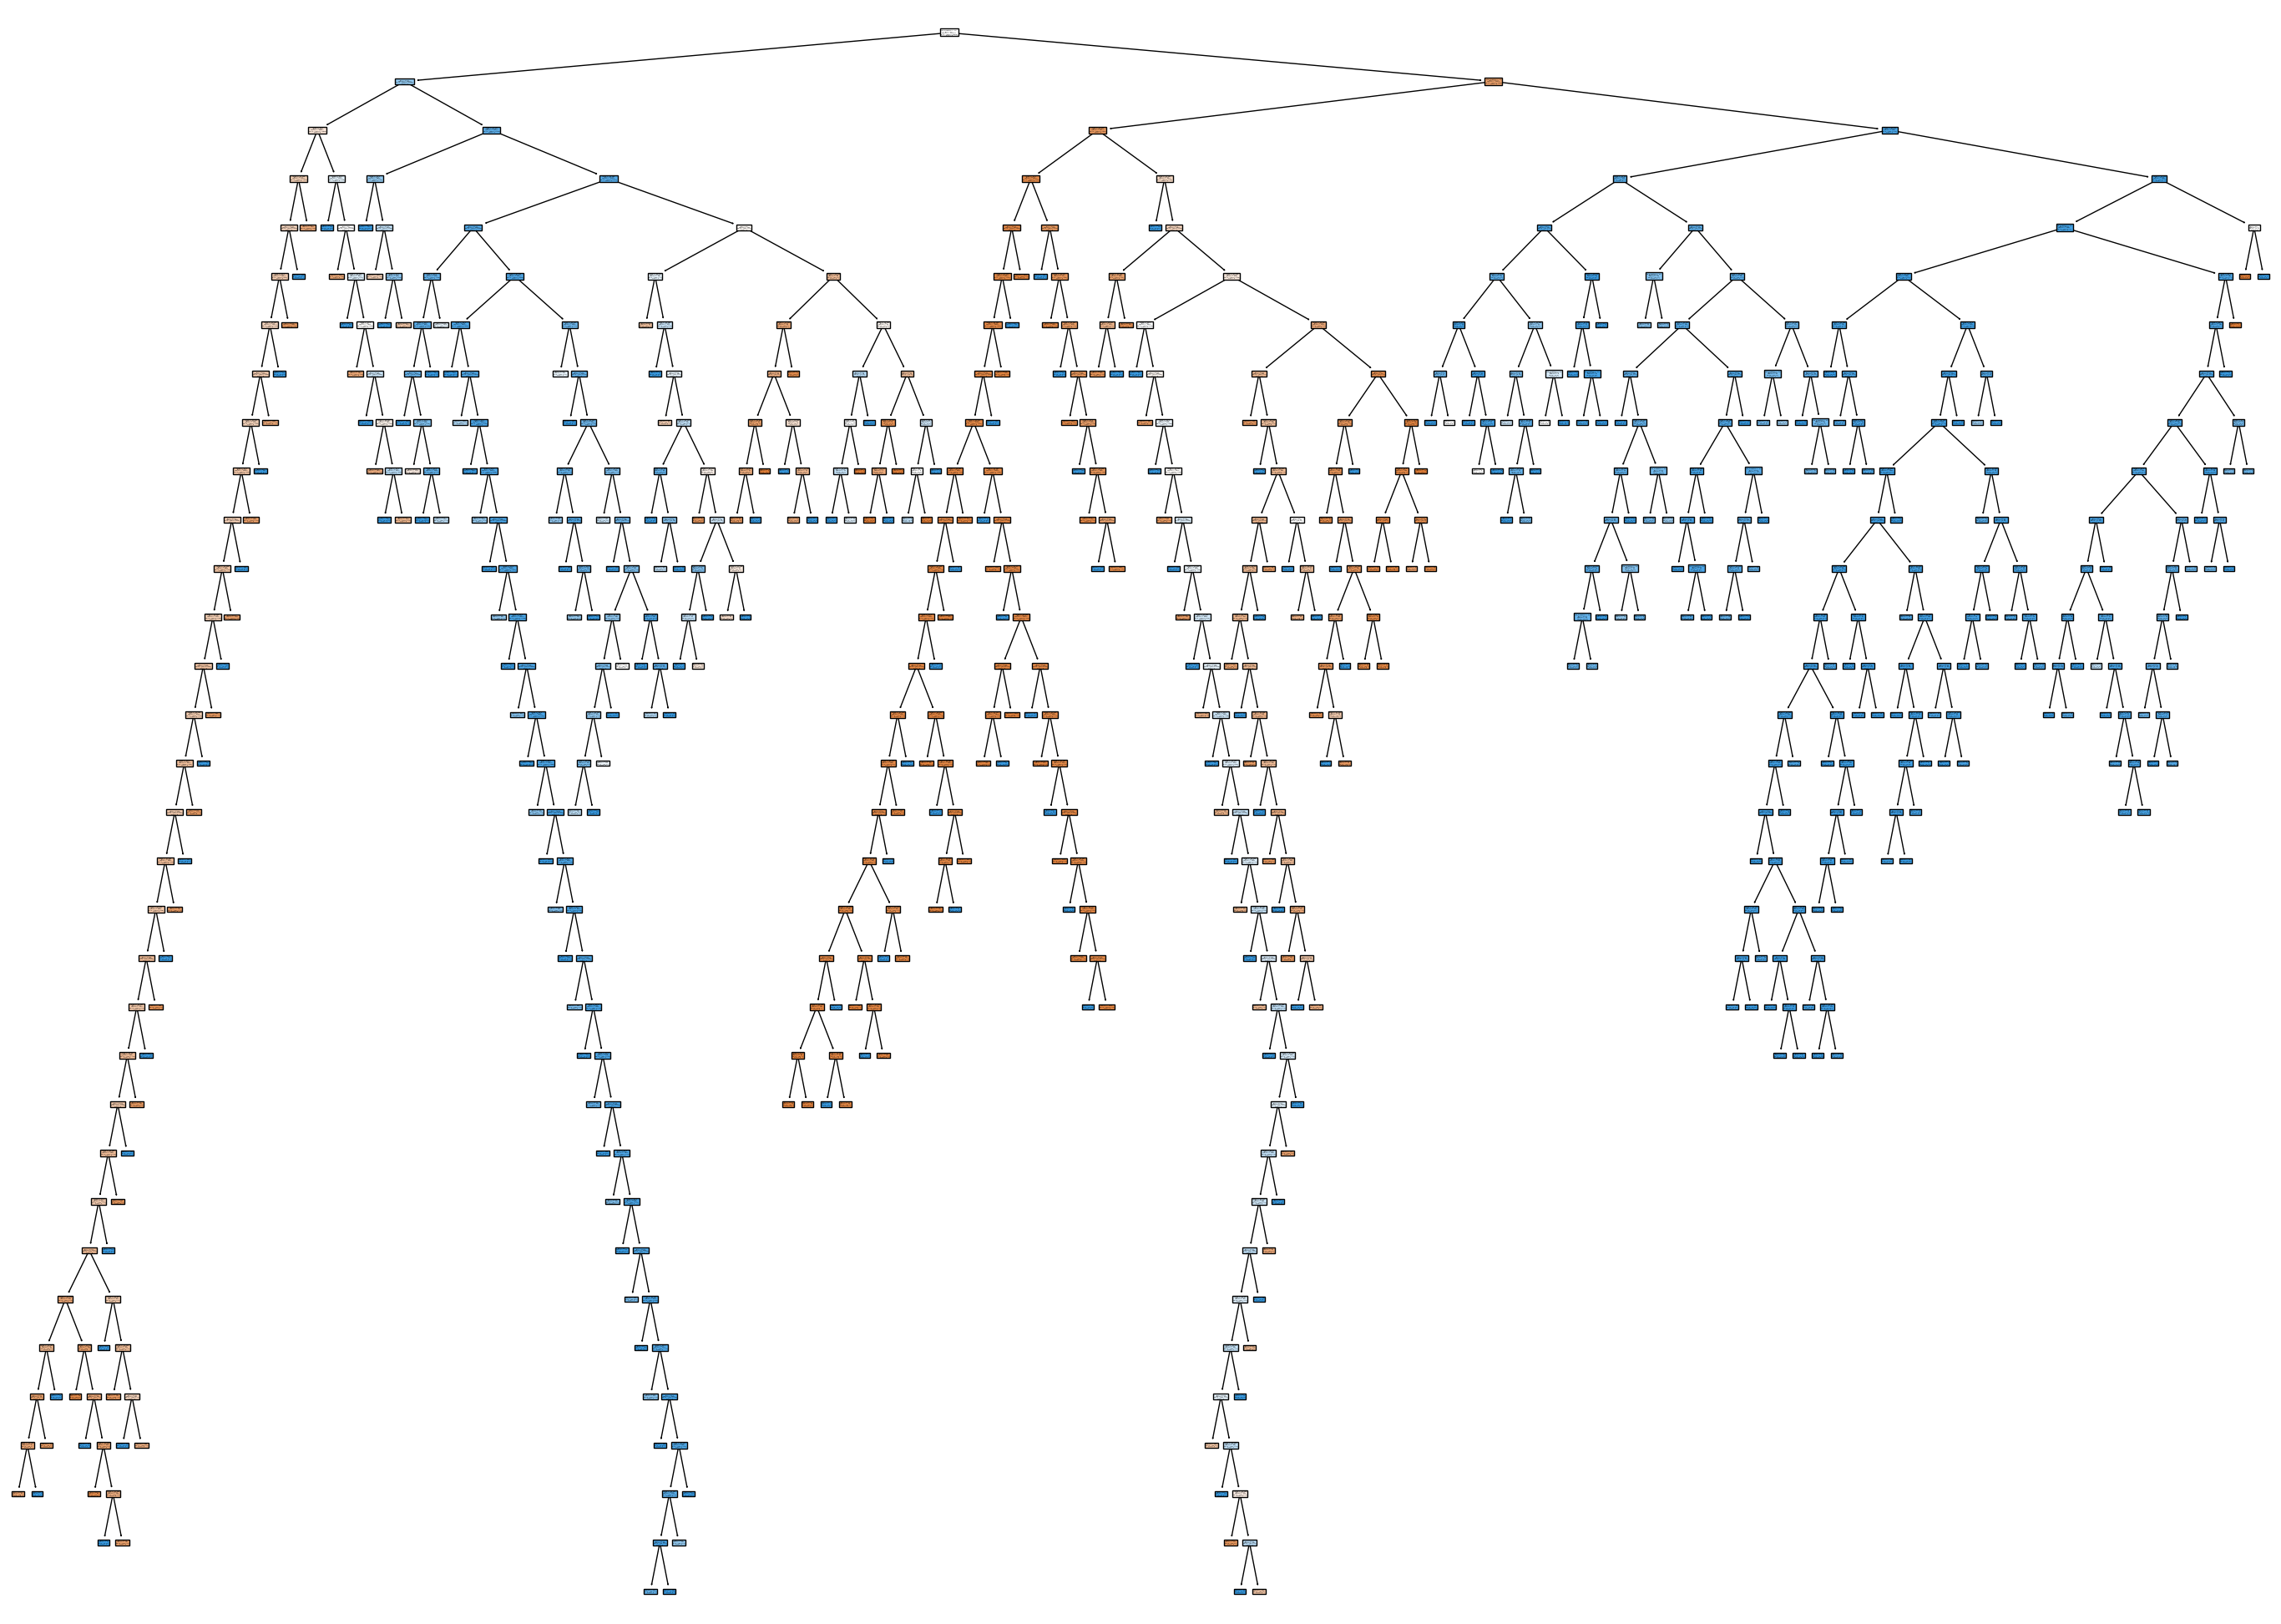

In [20]:
plt.figure(figsize=(35,25))
plot_tree(arvore_churn_reduzido, filled=True, feature_names=X_train_copy_reduzido.columns, class_names=['0', '1'])
plt.show()

<font color='darkblue'>No relatório de classificação, vemos que a classe 0.0 (não churn) teve uma boa melhora o recall passou de 0.85 para 0.93. Já a classe 1.0 (churn) o recall teve uma pequena queda de 0.56 para 0.52, todavia a precisão subiu de 051 para 0.67 o que é uma otima melhora. apresenta um desempenho fraco, tendo o recall 0.56. Isso mostra que o modelo consegue identificar 56% dos clientes que realmente saíram.  O modelo teve uma melhora na acurácia de 0.79 para 0.85.</font>

<font color='darkblue'>Com a matriz_confusão, notamos que o modelo previu corretamente 18.309 clientes que ficaram (verdadeiro negativo) e 2.758 clientes que deram churn (verdadeiro positivo). Porém, vemos que o modelo errou ao prever que 1.340 clientes deram churn, enquanto, na verdade, os clientes permaneceram (falsos positivo) e deixou de identificar 2.520 clientes que realmente saíram, tiveram churn (falsos negativos).</font>

<font color='darkblue'>Podemos observar que o número de falsos positivo diminuiu em 1.511 enquanto o número de falsos negativos aumentaram em 210. E a acruacia aumentou em 06.</font>

----

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

| Modelo: Naive Bayes | Acurácia treino | Acurácia teste | Recall treino | Recall teste |
| ------------------- | --------------- | -------------- | ------------- | ------------ |
| naive\_churn        | 0.585           | 0.555          | 0.6355        | 0.648        |
| naive\_Score\_high  | 0.994           | 1.0            | 0.988         | 1.0          |
| naive\_Score\_low   | 0.996           | 1.0            | 1.0           | 1.0          |

| Modelo: arvore decisoes | precision       | recall         | f1-score      | support      |
| ----------------------- | --------------- | -------------- | ------------- | ------------ |
| accuracy                |                 |                | 0.792         | 24927        |
| macro avg               | 0.690           | 0.710          | 0.700         | 24927        |
| weighted avg            | 0.800           | 0.790          | 0.800         | 24927        |

| Modelo: arvore reduzida | precision       | recall         | f1-score      | support      |
| ----------------------- | --------------- | -------------- | ------------- | ------------ |
| accuracy                |                 |                | 0.850         | 24927        |
| macro avg               | 0.780           | 0.730          | 0.750         | 24927        |
| weighted avg            | 0.840           | 0.850          | 0.840         | 24927        |

<font color='darkblue'>Os resultados do naive bayes nos mostram que a acurácia treino/teste: 0.585 / 0.555 é bem baixa, o modelo não consegue generalizar e, apesar do recall treino/teste: 0.635 / 0.648 conseguir identificar os clientes que deram churn, ainda há muita perda de acurácia. Já as versões Score_high e Score_low estão com acurácia = 1.0, o que pode representar um overfitting.</font>

<font color='darkblue'>Na árvore de decisão completa, temos uma acurácia de 0.792 o que já representa uma melhora considerável se comparada ao naive bayes, um macro recall de 0.710 e weighted avg F1 de 0.800 o que nos leva a concluir que o modelo acerta melhor na detecção das classes e mostra um bom equilíbrio.</font>

<font color='darkblue'>Na árvore de decisão reduzida (com somente 2 features), observamos uma acurácia (0.850) ainda maior do que a árvore de decisão completa, um macro recall de 0.730 que é um pouco melhor que a árvore completa, e um weighted avg F1 (0.840) também superior.</font>

<font color='darkblue'>Assim podemos notar que a árvore de decisão, mesmo reduzida, apresenta resultados bem mais confiáveis para prever o churn do nosso dataset.</font>